In [4]:
import os
import cv2
import numpy as np
from  tqdm import tqdm

REBUILD_DATA = True

class DogVSCats():
    IMG_SIZE = 50
    CATS = "D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Cat"
    DOGS = "D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Dog"
    LABELS = {CATS: 0, DOGS: 1}

    training_data = []
    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                    self.training_data = np.array(self.training_data, dtype=object)

                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    pass
                    # print(str(e))
        np.random.shuffle(self.training_data)
        np.save("train_data.npy", self.training_data, allow_pickle=True)
        print("Cats: ", self.catcount)
        print("Dogs: ", self.dogcount)

if REBUILD_DATA:
    dogsvcats = DogVSCats()
    dogsvcats.make_training_data()

<>:10: SyntaxWarning: invalid escape sequence '\K'
<>:11: SyntaxWarning: invalid escape sequence '\K'
<>:10: SyntaxWarning: invalid escape sequence '\K'
<>:11: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Spieg\AppData\Local\Temp\ipykernel_16940\3331596956.py:10: SyntaxWarning: invalid escape sequence '\K'
  CATS = "D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Cat"
C:\Users\Spieg\AppData\Local\Temp\ipykernel_16940\3331596956.py:11: SyntaxWarning: invalid escape sequence '\K'
  DOGS = "D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Dog"


D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Cat


100%|██████████| 12501/12501 [01:08<00:00, 183.53it/s]


D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Dog


100%|██████████| 12501/12501 [00:19<00:00, 633.09it/s] 

Cats:  1
Dogs:  0


In [5]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True

class DogVSCats():
    IMG_SIZE = 50
    CATS = "D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Cat"
    DOGS = "D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Dog"
    LABELS = {CATS: 0, DOGS: 1}

    training_data = []
    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    # Ensure the label is a one-hot encoded array
                    label_array = np.eye(2)[self.LABELS[label]]
                    self.training_data.append([np.array(img), label_array])

                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    # print(f"Error processing file {f}: {e}")
                    continue
        
        # Shuffle the data
        np.random.shuffle(self.training_data)
        
        # Check for consistency
        inconsistent_data = []
        for data in self.training_data:
            if not isinstance(data[0], np.ndarray) or data[0].shape != (self.IMG_SIZE, self.IMG_SIZE):
                inconsistent_data.append(data)
                
        if inconsistent_data:
            print("Inconsistent data found. Skipping these entries.")
            self.training_data = [data for data in self.training_data if data not in inconsistent_data]

        # Save the training data
        np.save("train_data.npy", np.array(self.training_data, dtype=object), allow_pickle=True)
        print("Cats: ", self.catcount)
        print("Dogs: ", self.dogcount)

if REBUILD_DATA: 
    dogsvcats = DogVSCats()
    dogsvcats.make_training_data()


<>:10: SyntaxWarning: invalid escape sequence '\K'
<>:11: SyntaxWarning: invalid escape sequence '\K'
<>:10: SyntaxWarning: invalid escape sequence '\K'
<>:11: SyntaxWarning: invalid escape sequence '\K'
C:\Users\Spieg\AppData\Local\Temp\ipykernel_16940\4114452992.py:10: SyntaxWarning: invalid escape sequence '\K'
  CATS = "D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Cat"
C:\Users\Spieg\AppData\Local\Temp\ipykernel_16940\4114452992.py:11: SyntaxWarning: invalid escape sequence '\K'
  DOGS = "D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Dog"


D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Cat


100%|██████████| 12501/12501 [00:08<00:00, 1474.68it/s]


D:\KMUTT\Year 4th\ENE490 DL\Coding\PetImages\Dog


100%|██████████| 12501/12501 [00:08<00:00, 1400.51it/s]


Cats:  12476
Dogs:  12470


In [25]:
training_data = np.load("train_data.npy", allow_pickle=True)
print(len(training_data))
print(training_data[0])

24946
[array([[175, 178, 164, ...,  71,  80,  70],
        [168, 174, 176, ...,  76,  86,  90],
        [171, 173, 179, ...,  82,  81,  90],
        ...,
        [ 28,  26,  23, ...,  54,  53,  54],
        [ 26,  26,  23, ...,  50,  59,  55],
        [ 26,  25,  22, ...,  52,  49,  49]], dtype=uint8) array([0., 1.])]


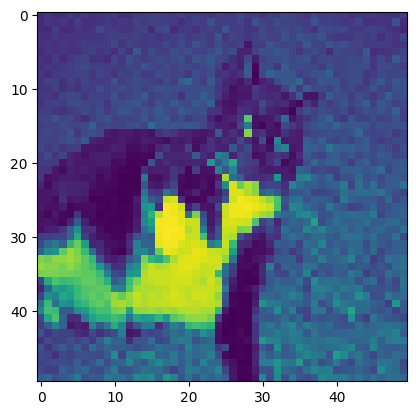

In [34]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap=None)
plt.show()

In [35]:
training_data[1][1]

array([1., 0.])